 # Task-2 : IRIS FLOWER CLASSIFICATION

  ## Codsoft Internship
  ## Author : Piyush Dilip Jethwa
  ## Batch : Aug-Sept

* The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.
    Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

In [249]:
# importing necessory libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Ignoring warnings
import warnings
warnings.filterwarnings(action="ignore")

# Data transfromation modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

# Data splitting modules 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [205]:
# importing the datset
df = pd.read_csv("IRIS.csv")

In [206]:
# first five records
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [207]:
# Statistical discription of the datset 
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## EDA

### Missing Value handling

In [208]:
# No of null values in each features 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

[]

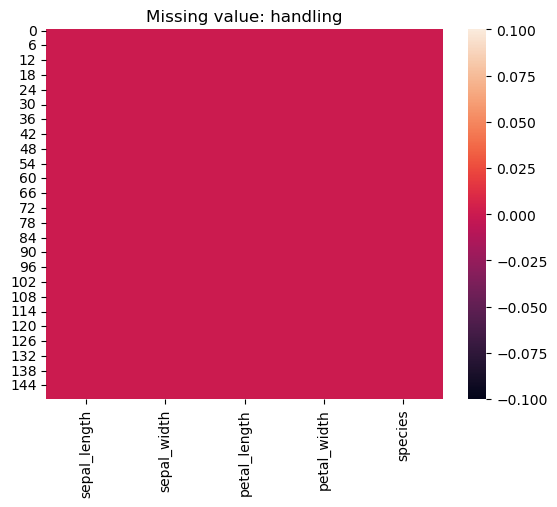

In [209]:
# Heatmap : Visualisation of the missing values
plt.title("Missing value: handling")
sns.heatmap(df.isnull())
plt.plot()

* So, the dataset has no missing values.

### Datatypes

In [210]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Value count: target feature

In [211]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### Filtering the data frame based on species

In [212]:
iris_setosa_df = df[df['species'] == 'Iris-setosa']
iris_versicolor_df = df[df['species'] == 'Iris-versicolor']
iris_virginica_df = df[df['species'] == 'Iris-virginica']

### Data Visulalisation
* Distrubution of petal length,petal width,sepal length,sepal width

In [213]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

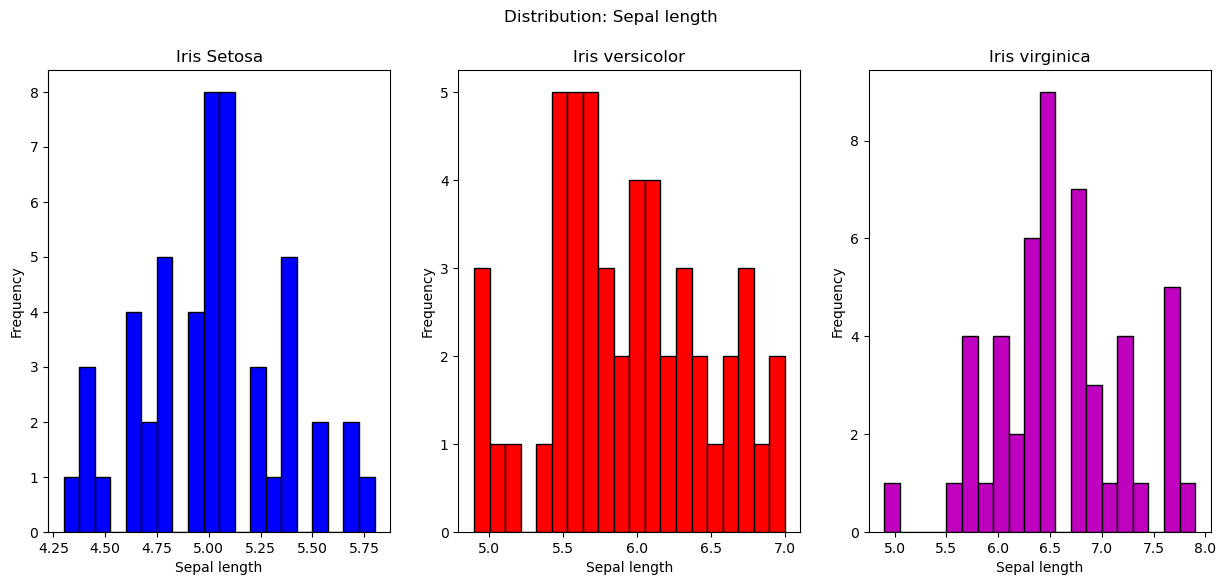

In [214]:
plt.figure(figsize=(15,6))
plt.suptitle("Distribution: Sepal length")
plt.subplot(1,3,1)
plt.title("Iris Setosa")
iris_setosa_df["sepal_length"].plot(kind="hist",bins=20,color="b",edgecolor="k")
plt.xlabel("Sepal length")
plt.subplot(1,3,2)
plt.title("Iris versicolor")
iris_versicolor_df["sepal_length"].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.xlabel("Sepal length")
plt.subplot(1,3,3)
plt.title("Iris virginica")
iris_virginica_df["sepal_length"].plot(kind="hist",bins=20,color="m",edgecolor="k")
plt.xlabel("Sepal length")
plt.show()

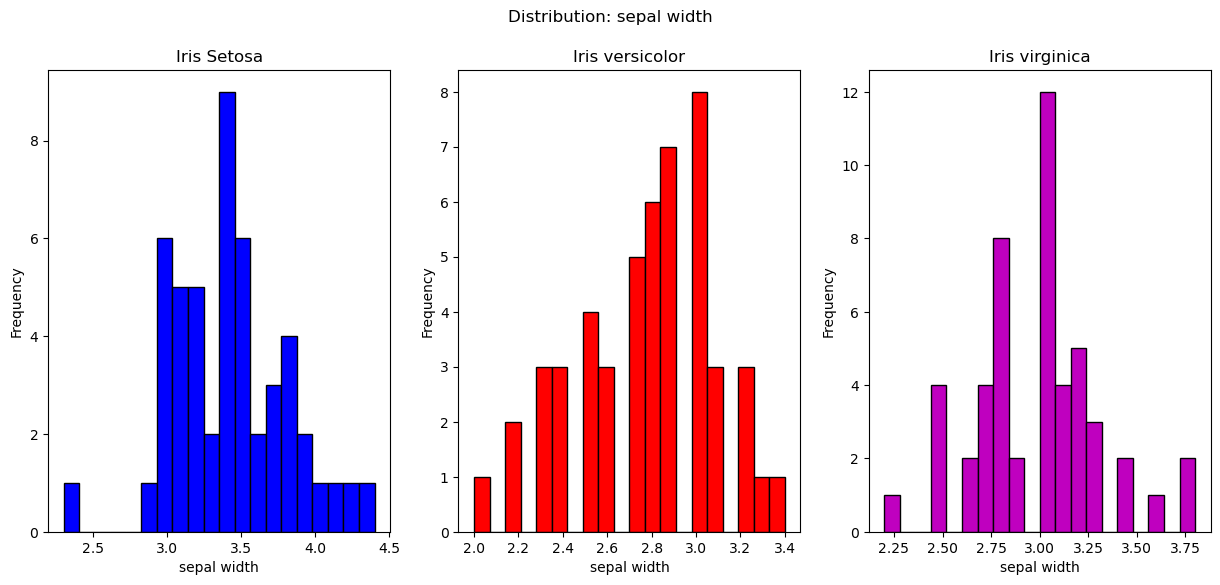

In [215]:
plt.figure(figsize=(15,6))
plt.suptitle("Distribution: sepal width")
plt.subplot(1,3,1)
plt.title("Iris Setosa")
iris_setosa_df["sepal_width"].plot(kind="hist",bins=20,color="b",edgecolor="k")
plt.xlabel("sepal width")
plt.subplot(1,3,2)
plt.title("Iris versicolor")
iris_versicolor_df["sepal_width"].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.xlabel("sepal width")
plt.subplot(1,3,3)
plt.title("Iris virginica")
iris_virginica_df["sepal_width"].plot(kind="hist",bins=20,color="m",edgecolor="k")
plt.xlabel("sepal width")
plt.show()

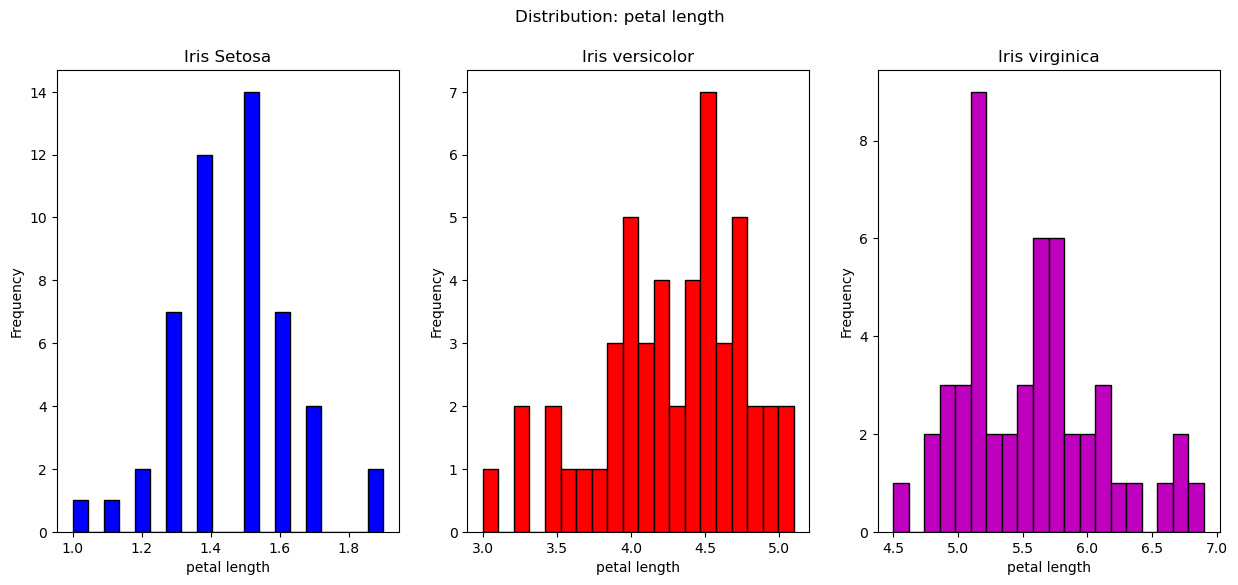

In [216]:
plt.figure(figsize=(15,6))
plt.suptitle("Distribution: petal length")
plt.subplot(1,3,1)
plt.title("Iris Setosa")
iris_setosa_df["petal_length"].plot(kind="hist",bins=20,color="b",edgecolor="k")
plt.xlabel("petal length")
plt.subplot(1,3,2)
plt.title("Iris versicolor")
iris_versicolor_df["petal_length"].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.xlabel("petal length")
plt.subplot(1,3,3)
plt.title("Iris virginica")
iris_virginica_df["petal_length"].plot(kind="hist",bins=20,color="m",edgecolor="k")
plt.xlabel("petal length")
plt.show()

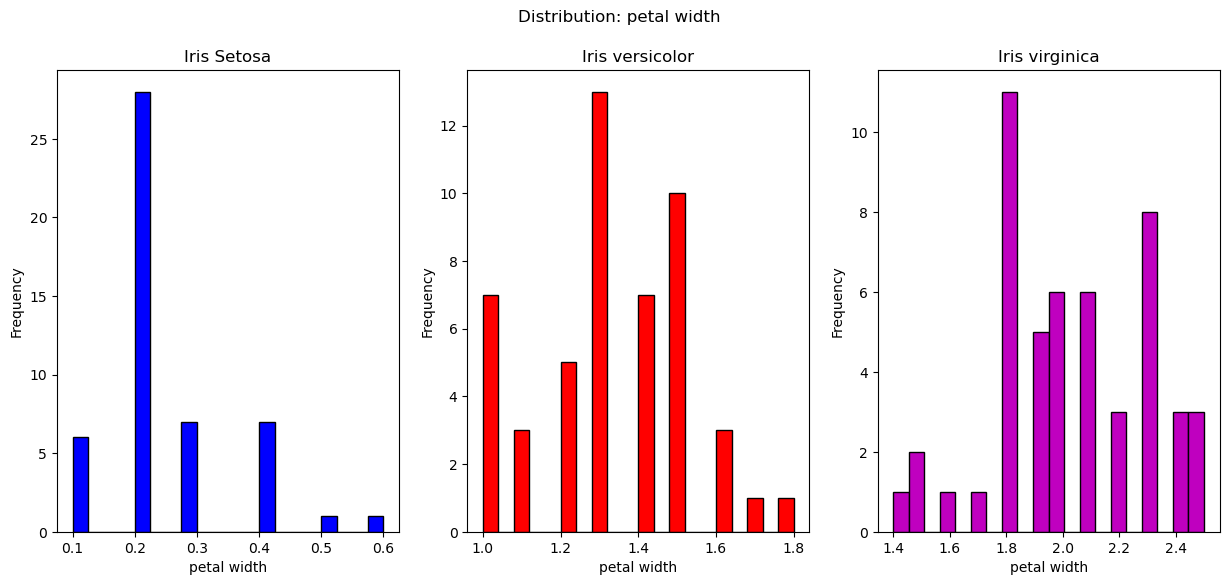

In [217]:
plt.figure(figsize=(15,6))
plt.suptitle("Distribution: petal width")
plt.subplot(1,3,1)
plt.title("Iris Setosa")
iris_setosa_df["petal_width"].plot(kind="hist",bins=20,color="b",edgecolor="k")
plt.xlabel("petal width")
plt.subplot(1,3,2)
plt.title("Iris versicolor")
iris_versicolor_df["petal_width"].plot(kind="hist",bins=20,color="r",edgecolor="k")
plt.xlabel("petal width")
plt.subplot(1,3,3)
plt.title("Iris virginica")
iris_virginica_df["petal_width"].plot(kind="hist",bins=20,color="m",edgecolor="k")
plt.xlabel("petal width")
plt.show()

### Encoding the target feature(species)

In [218]:
# Mapping the categorical features with numerical values
df["species"] = df["species"].map({"Iris-setosa":1,"Iris-versicolor":2,'Iris-virginica':3})

* labels
(1 - Iris Setosa,
2 -  Iris versicolor,
3 - Iris virgnica)

### Corelation 

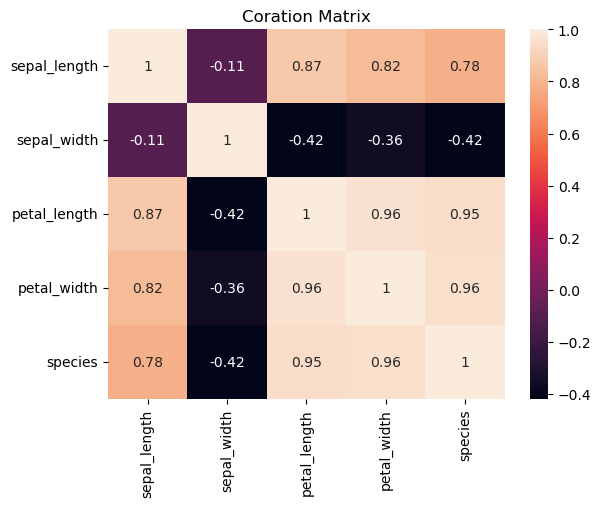

In [219]:
# heatmap: corelation matrix
plt.title("Coration Matrix")
sns.heatmap(df.corr(),annot=True)
plt.show()

* Petal length and petal width are highly colenear feature (0.96)ie, multicolenear features.so we can remove one among the feature
* Sepal length and petal width are highly colear feature(0.82)


### Data Reduction

In [220]:
# ignoring the petal length,sepal length,sepal_width since it is multicolinear with sepal length
df.drop(columns=['petal_length',"sepal_length","sepal_width"],inplace=True)

### Splitting target feature

In [230]:
# splitting the target feature 
X = df.drop(columns=["species"])
y = df["species"]

### Transformation Function

In [231]:
# Appliying the transformation function
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Training the model using cross validation score

* Since the datset is very small, we use cross validation score

In [244]:
### Training of the model using Logistic regression,Decision tree classifier,random forest classifier,support vector classifer,Kneigbors classifer
kfold = KFold(n_splits=10)
accuracy = []
models = ["Logistic regression","Decision Tree Classifier","Random Forest Classifer","Support vector Classifier","K neighbours classifier"]

l_model = LogisticRegression()
l_results = cross_val_score(l_model,X,y,cv=kfold)
print("mean accuracy of Logistic regression: ",l_results.mean())
accuracy.append(100 * l_results.mean())

dtc_model = DecisionTreeClassifier()
dtc_results = cross_val_score(dtc_model,X,y,cv=kfold)
print("mean accuracy of Decision Tree classifier: ",dtc_results.mean())
accuracy.append(100 * dtc_results.mean())

rfc_model = RandomForestClassifier()
rfc_results = cross_val_score(rfc_model,X,y,cv=kfold)
print("mean accuracy of Random Forst classifier: ",rfc_results.mean())
accuracy.append(100 * rfc_results.mean())

svc_model = SVC()
svc_results = cross_val_score(svc_model,X,y,cv=kfold)
print("mean accuracy of Support vector Classifier: ",svc_results.mean())
accuracy.append(100 * svc_results.mean())

knn_model = KNeighborsClassifier()
knn_results = cross_val_score(knn_model,X,y,cv=kfold)
print("mean accuracy of K Neighbours classifier: ",knn_results.mean())
accuracy.append(100 * knn_results.mean())

mean accuracy of Logistic regression:  0.8066666666666666
mean accuracy of Decision Tree classifier:  0.9533333333333334
mean accuracy of Random Forst classifier:  0.9533333333333334
mean accuracy of Support vector Classifier:  0.96
mean accuracy of K Neighbours classifier:  0.96


### Evaluation of the performance of the model

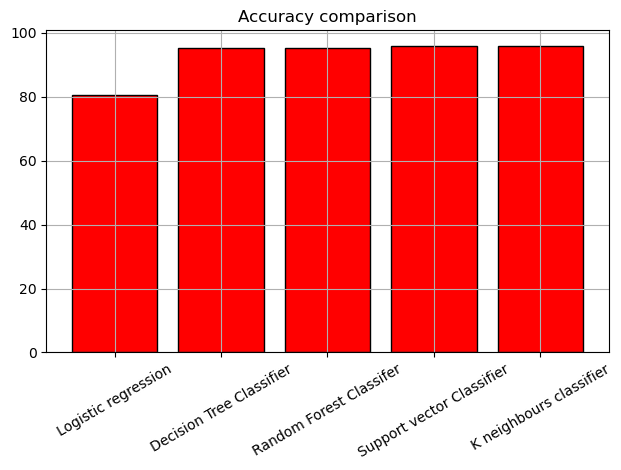

In [245]:
plt.title("Accuracy comparison")
plt.bar(models,accuracy,color="r",edgecolor="k")
plt.xticks(rotation=30)
plt.grid(True)
plt.tight_layout()
plt.show()

* So,Support Vector and k Neighbours classifier has work well with 96+% accuracy